# 1 Introduction

In this week's exercise session we will learn how to use Machine Learning methods to solve regression problems. In particular, we will focus on linear regression. 

First let us import the libraries we will be using during this exercise:

In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
np.random.seed(42)
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# 2 The regression problem

We have seen in class that regression refers to predicting continous values for a given sample. A nice example could be predicting the first salary of a student after graduation given how diligent they were with attending machine learning exercise sessions. We were introduced to the "linear regression method". 

**Q: How does a regression problem differ from a classification problem?**

**Q: Why is the linear regression model a linear model?**


# 2.1 Load and inspect the data

This week, using the linear regression method, we will analyze the Boston house prices data set and predict costs based on properties such as per capita crime rate by town, pupil-teacher ratio by town, etc.

We load the data and split it such that 80% and 20% are training and test data, respectively. 

In [2]:
# get the data set and print a description
from sklearn.datasets import load_boston
boston_dataset = load_boston()
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [3]:
X = boston_dataset["data"]
y = boston_dataset["target"]

# remove categorical feature
X = np.delete(X, 3, axis=1)
# removing second mode
ind = y<40
X = X[ind,:]
y = y[ind]

print("Shape of the data sample matrix X:", X.shape)

N = X.shape[0]
D = X.shape[1]
print("The number of data samples is N:", N)
print("The number of features is D:", D)


print("\nShape of the labels vector y:", y.shape)


print("\nFirst data sample in X:", X[0,:])
print("First label in y:", y[0])



Shape of the data sample matrix X: (475, 12)
The number of data samples is N: 475
The number of features is D: 12

Shape of the labels vector y: (475,)

First data sample in X: [6.320e-03 1.800e+01 2.310e+00 5.380e-01 6.575e+00 6.520e+01 4.090e+00
 1.000e+00 2.960e+02 1.530e+01 3.969e+02 4.980e+00]
First label in y: 24.0


Our first exercise is to split the data into training and test sets. Let's set aside 80% of the data for training and 20% for testing. 

Your steps should be the following ones:
1. Generate a vector of indices from 0 to N-1 (with N being the number of data samples) (Hint: you can use the function np.arange()
2. Shuffle the indices (hint: you can use np.random.shuffle(). Look up how to use this function!)
3. Select 80% of the indices. We have coded this for you but make sure you understand what these lines are doing!

In [4]:
split_ratio = 0.8

# Step 1:
indices = #YOUR CODE HERE

# Step 2:
#YOUR CODE HERE

# Step 3:
X_train    = X[indices[0:int(N*split_ratio)],:] 
y_train    = y[indices[0:int(N*split_ratio)]] 
# Split the test data using the remaining indices!
X_test     = #YOUR CODE HERE
y_test     = #YOUR CODE HERE

SyntaxError: invalid syntax (<ipython-input-4-976097e87ee0>, line 4)

Check the shapes of `X_train`, `y_train`, `X_test`, `y_test`

In [5]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

# The shapes should be (380, 12), (380,), (95, 12), (95,)

NameError: name 'X_train' is not defined

After, we normalize the data such that each feature has zero mean and unit standard deviation. (Since you have not seen this in the lectures yet, we have provided the code for you. Study this well, we will be doing a lot of normalization during the exercise sessions!)

In [24]:
'''
Make mean 0 and std dev 1 of the data.
'''
def normalize(X):
    mu    = np.mean(X,0,keepdims=True)
    std   = np.std(X,0,keepdims=True) 
    X     = (X-mu)/std
    return X, mu, std

#Use train stats for normalizing test set
X_train,mu_train,std_train = normalize(X_train)
X_test = (X_test-mu_train)/std_train

Text(0.5, 1.0, 'Attribute $X_4$ vs Price $y$')

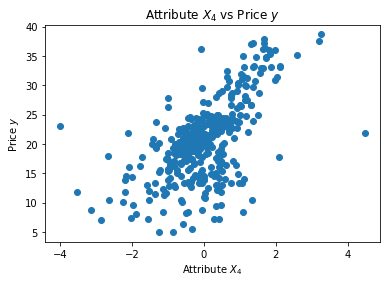

In [25]:
# Exploratory analysis of the data. Have a look at the distribution of prices vs features

feature = 4
plt.scatter(X_train[:,feature], y_train)
plt.xlabel(f"Attribute $X_{feature}$")
plt.ylabel("Price $y$")
plt.title(f"Attribute $X_{feature}$ vs Price $y$")


**Q: Using the code above, explore the relation between different features and the house prices. Describe what you see. Can you identify any trends?**


# 2.2 Closed-form solution for linear regression


The linear regression method has a closed form, analytical solution, as we have also seen in class.

$$ \mathbf{w^*} = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y} $$


Now let's code the analytical solution in the function `get_w_analytical` and to obtain the weight parameters $\mathbf{w}$. Tip: You may want to use the function np.linalg.pinv(). 


In [2]:
def get_w_analytical(X_train,y_train):
    """
    compute the weight parameters w
    """
        
    # compute w via the analytical solution
    w = ## YOUR CODE HERE
    return w


SyntaxError: invalid syntax (<ipython-input-2-7d83d77f9b9b>, line 8)

To assess our method's performance, we'll be using the mean squared error (MSE). 

$$ MSE = \frac{1}{N}\sum_{i=1}^N (\hat{y}_i - y_i)^2$$

where our prediction $\hat{y}_i = \mathbf{x}_i^T \cdot \mathbf{w} $.



Let's code this!

In [27]:

def get_loss(w, X_train, y_train,X_test,y_test):

    loss_train = # YOUR CODE HERE
    loss_test = # YOUR CODE HERE
    print("The training loss is {}. The test loss is {}.".format(loss_train, loss_test))
    
    return loss_test

In [28]:
#Let's test our code!
w_ana = get_w_analytical(X_train,y_train)
get_loss(w_ana, X_train,y_train, X_test,y_test)

The training loss is 436.8437185477003. The test loss is 437.3294638920944.


437.3294638920944

**Q: What is the shape of the analytical weights?**


# 2.3. Adding a bias term

The error of 400 is quite high! Note however that, in contrast to what we have seen in the lectures, we did not use any bias term $\text{w}^{(0)}$. Let's see whether we can reduce the error by including a bias term.

First, let's look more closely at what happens without a bias term. Formally, without a bias term, we are fitting a hyperplane that always passes through the origin. This is because our predictions can be expressed as
$$ \hat{y}_i = \text{w}^{(1)}x_i^{(1)} +  \text{w}^{(2)}x_i^{(2)} + ... + \text{w}^{(12)}x_i^{(12)} $$

or

$$ \hat{y}_i = \mathbf{x}_i^T \cdot \mathbf{w} $$ 

Therefore, when $\mathbf{x}_i=\mathbf{0}$, $\hat{y}_i= 0$, no matter what values $\mathbf{w}$ takes. That's not ideal!

Note: If you are confused about the transpose operation in $\hat{y}_i = \mathbf{x}_i^T \cdot \mathbf{w}$ above, here are the shapes of the matrices that are being multiplied:  
* $\mathbf{w}$ is DX1 
* $\mathbf{x}_i$ is DX1 (A reminder: The entire data $\mathbf{X}$ is NXD, but when we select a single data sample from it, we express it as a column vector!) 
* The result $\hat{y}_i$ is 1x1




**Introducing the bias term:**
        
It would be a lot nicer if our predicted hyperplane didn't always have to pass through the origin. In math words:

$$ \hat{y}_i = \text{w}^{(0)} + \text{w}^{(1)}x_i^{(1)} +  \text{w}^{(2)}x_i^{(2)} + ... + \text{w}^{(12)}x_i^{(12)} $$

Here, the $\text{w}^{(0)}$ is the y-intercept. When $\mathbf{x}_i=\mathbf{0}$, $y_i= \text{w}^{(0)}$. Neat!


To handle this, we can add a column of 1s as a feature in our data $\mathbf{X}$. This way, we could just say that the last feature $x_i^{(0)} = 1$ and

$$ \hat{y}_i = \text{w}^{(0)}\cdot 1 + \text{w}^{(1)}x_i^{(1)} +  \text{w}^{(2)}x_i^{(2)} + ... + \text{w}^{(12)}x_i^{(12)} $$

$$ \hat{y}_i = \text{w}^{(0)}x_i^{(0)} + \text{w}^{(1)}x_i^{(1)} +  \text{w}^{(2)}x_i^{(2)} + ... + \text{w}^{(12)}x_i^{(12)} $$

$$ \hat{y}_i = \mathbf{x}_i^T \cdot \mathbf{w} $$ 





And we can keep using the same analytical solution formula as above! So by adding a column of 1s as the last feature of $\mathbf{X}$, and running the analytical solution, we will find a $\mathbf{w}$ with 13 features instead of 12. The last feature of the weights $\mathbf{w}^{(0)}$ will be the bias term. This way, we wouldn't have to change any of the functions we wrote above.

So let's get to it! Fill in the function below to append a bias term to the data matrices $\mathbf{X}$. Your steps should be the following:
1. Create a numpy array that is a column of 1s. It's shape should be NX1.
2. Concatenate the ones column with the data matrix. Hint: use np.concatenate. Be careful what axis you specify!




In [29]:
def append_bias_term(X_train):

    ones_column = # YOUR CODE HERE
    X_train_bias = # YOUR CODE HERE
    return X_train_bias

In [30]:
X_train_bias = append_bias_term(X_train)
X_test_bias = append_bias_term(X_test)

w_ana = get_w_analytical(X_train_bias,y_train)

get_loss(w_ana, X_train_bias,y_train, X_test_bias,y_test)

The training loss is 10.399481428585583. The test loss is 11.792470347125802.


11.792470347125802

Now your loss should be around 10. That's much better, no?

# 2.4. Solution using gradient descent

The linear regression model has an analytical solution, but we can also get the weight parameters $\mathbf{w}$ numerically, e.g., via gradient descent. We will be using this approach to complete the function `get_w_numerical` below.

First, let us code the gradient of the MSE loss, as we saw in class:
$$\nabla R = \frac{2}{N}\sum_i^N(\mathbf{x}_i^T \mathbf{w}-y_i)\cdot \mathbf{x}_i$$

In [81]:
def find_gradient(X, y, w):
    """computes the gradient of the empirical risk, R"""

    N = X.shape[0]
    
    
    # YOUR CODE HERE
    grad = # YOUR CODE HERE
    return grad
    

In [83]:
#Let's create a random w to test the function above.
w = np.random.normal(0, 1e-1, X_train_bias.shape[1])
grad = find_gradient(X_train_bias, y_train, w)
print(grad.shape)

(13,)


And now, we can write the function that finds $\mathbf{w}$ using gradient descent. Recall that gradient descent works via the update
$$w_{k} \leftarrow w_{k-1} - \eta \nabla R$$

where $\eta$ is the learning rate and $k$ is the iteration number.

Fill in the function below to update $\mathbf{w}$.

In [84]:
def get_w_numerical(X_train,y_train,X_test,y_test,epochs,lr):
    """compute the weight parameters w"""
    
    # initialize the weights
    w = np.random.normal(0, 1e-1, X_train.shape[1])
    
    # iterate a given number of epochs over the training data
    for epoch in range(epochs):
        
        w = # YOUR CODE HERE
       
        # Test every 500 epochs to see whether the training loss and test losses are going down.
        if epoch % 500 == 0:
            print(f"\nEpoch {1000+epoch}/{epochs}")
            get_loss(w, X_train,y_train, X_test,y_test)
            
    return w

In [85]:
# compute w and calculate its performance
w_num = get_w_numerical(X_train_bias,y_train,X_test_bias,y_test,15000,1e-3)


Epoch 1000/15000
The training loss is 458.26690845194184. The test loss is 513.8865535421918.

Epoch 1500/15000
The training loss is 69.19649490115566. The test loss is 72.76317320445149.

Epoch 2000/15000
The training loss is 19.314258568744034. The test loss is 21.766843249486584.

Epoch 2500/15000
The training loss is 12.33384723727525. The test loss is 14.54478937842012.

Epoch 3000/15000
The training loss is 11.222893761583165. The test loss is 13.313278945659208.

Epoch 3500/15000
The training loss is 10.952374598104633. The test loss is 12.945616334091628.

Epoch 4000/15000
The training loss is 10.827048542364215. The test loss is 12.736835174785263.

Epoch 4500/15000
The training loss is 10.743218305118281. The test loss is 12.582439663758894.

Epoch 5000/15000
The training loss is 10.680551255963108. The test loss is 12.460801380724417.

Epoch 5500/15000
The training loss is 10.632043845289465. The test loss is 12.363098123388923.

Epoch 6000/15000
The training loss is 10.593

If everything went well, then your loss should be going down with each epoch!


**Q: How do these results compare to those of the analytical solution?**

**Q: In which cases may it be preferable to use the numerical approach over the analytical solution?**


# 2.5 Using sklearn


We can also use the sklearn implementation of the linear regression model. sklearn is a library that contains implementations of many popular machine learning models, including the linear regression model!

Please look up the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) to 

1. instantiate the LinearRegression model
2. fit the model to our training data
3. evaluate the model on the test data
4. and compare the results with our previous outcomes

Especially check out the example code they provide!

In [71]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# YOUR CODE HERE
# YOUR CODE HERE
# YOUR CODE HERE
y_hat = # YOUR CODE HERE

print('MSE of sklearn linear regression model on test data: ' , metrics.mean_squared_error(y_test,y_hat))

MSE of sklearn linear regression model on test data:  14.16264188537605
